<h2>DL Group 10</h2>


<table>
  <tr>
    <th>Student Name</th>
    <th>BITS ID</th>
    <th>Contribution</th>
  </tr>
  <tr>
    <td>ADITYA NANDAN REDDY SANIVARAPU</td>
    <td>2022dc04019</td>
    <td>100%</td>
  </tr>
  <tr>
    <td>SANJANA SANJEEV DESHPANDE</td>
    <td>2022dc04091</td>
    <td>100%</td>
  </tr>
  <tr>
    <td>DINESH KUMAR NAYAK</td>
    <td>2022da04293</td>
    <td>100%</td>
  </tr>
</table>

# Deep Neural Network using Keras

In [59]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

In [60]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
#tf.set_random_seed(42)  # sets the graph-level random seed

## Dataset

In [61]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

Text(0.5, 1.0, 'Ground Truth (Test): 7')

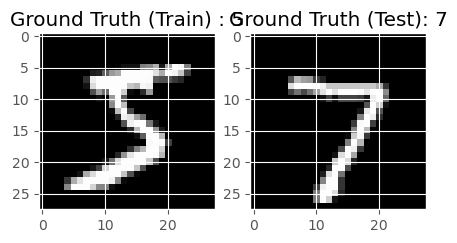

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(Xtrain[0,:,:], cmap='gray')
plt.title("Ground Truth (Train) : {}".format(Ytrain[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(Xtest[0,:,:], cmap='gray')
plt.title("Ground Truth (Test): {}".format(Ytest[0]))

In [63]:
# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [64]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  24 209 254 254 254
 171   0   0   0   0   0   0   0   0   0]
Xtest 
 [  0   0   0   0   0   0   0   0 194 254 103   0   0   0   0   0   0   0
   0   0 150 254 213   0   0   0   0   0]
Ytrain 
 3
Ytest 
 0


In [65]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [8]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 0.0
Xtest 
 0.0
Ytrain 
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Ytest 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## DNN Model

Using Keras, create the DNN or Sequential Model

In [9]:
# Create a model object

dnnModel = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [10]:
# Layer 1 = hidden layer
# specify the input size in the first layer.MLP

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(60, activation='relu'))

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))


# Layer 4 = output layer
# number of neurons = number of classes = 10
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 60)                3060      
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 44450 (173.63 KB)
Trainable params: 44450 (173.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


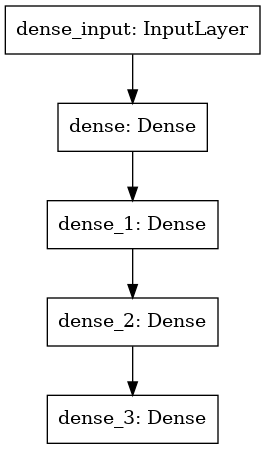

In [17]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(dnnModel, to_file='2A DNN.png')
from IPython.display import Image
Image(filename='2A DNN.png') 

## Regularization and Optimizations of DNN

In [11]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )

## Train the Model

In [12]:
# train the model



h  = dnnModel.fit( Xtrain, Ytrain, epochs=25, validation_split=0.1, batch_size=64)

Epoch 1/25


844/844 [==============================] - 2s 1ms/step - loss: 1.5221 - accuracy: 0.5548 - val_loss: 0.5456 - val_accuracy: 0.8695
Epoch 2/25
844/844 [==============================] - 1s 1ms/step - loss: 0.4726 - accuracy: 0.8694 - val_loss: 0.3152 - val_accuracy: 0.9118
Epoch 3/25
844/844 [==============================] - 1s 1ms/step - loss: 0.3576 - accuracy: 0.8993 - val_loss: 0.2680 - val_accuracy: 0.9282
Epoch 4/25
844/844 [==============================] - 1s 1ms/step - loss: 0.3110 - accuracy: 0.9110 - val_loss: 0.2393 - val_accuracy: 0.9335
Epoch 5/25
844/844 [==============================] - 1s 1ms/step - loss: 0.2791 - accuracy: 0.9199 - val_loss: 0.2181 - val_accuracy: 0.9388
Epoch 6/25
844/844 [==============================] - 1s 1ms/step - loss: 0.2536 - accuracy: 0.9267 - val_loss: 0.2047 - val_accuracy: 0.9407
Epoch 7/25
844/844 [==============================] - 1s 1ms/step - loss: 0.2318 - accuracy: 0.9320 - val_loss: 0.1888 - val_accuracy: 0.9470
Epoc

In [13]:
#print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])
#print('Final training loss \t', h.history['val_loss'][-1])
print('Final validation accuracy ', h.history['val_accuracy'][-1])

Final training accuracy  0.9731296300888062
Final validation accuracy  0.9710000157356262


## Testing the Model

In [91]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)
test_accuracy_model1 = testAccuracy

313/313 [==============================] - 1s 4ms/step - loss: 0.1158 - accuracy: 0.9664


In [92]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.11579049378633499
Testing accuracy  0.9664000272750854


In [93]:
num_classes = 9

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue = np.argmax(Ytest,axis = 1)

# Predict Labels
Ypredicted = dnnModel.predict(Xtest)
Ypredicted = np.argmax(np.round(Ypredicted),axis=1)


313/313 [==============================] - 1s 4ms/step


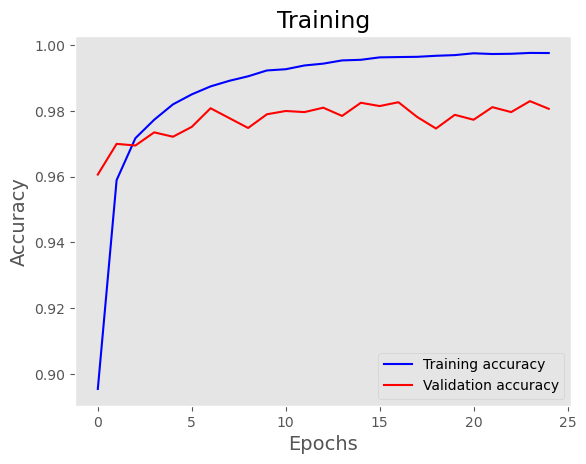

In [94]:
import matplotlib.pyplot as plt 

accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']

# plot loss and accuracy
epochs = range(len(accuracy))

plt.style.use('ggplot')
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.yticks((0.9,0.92,0.94,0.96,0.98,1.0))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right') 
plt.grid(None)

plt.show()

[[ 968    1    1    1    0    2    3    2    2    0]
 [   5 1121    2    1    0    1    2    2    1    0]
 [  17    0  996    3    3    0    3    5    4    1]
 [   8    0    7  981    0    3    0    4    6    1]
 [   7    0    4    0  944    0    5    2    0   20]
 [  14    1    0   21    2  831    8    3   10    2]
 [  13    3    2    1    6    3  927    0    3    0]
 [  14    8   13    0    0    0    0  985    2    6]
 [  20    1    6    4    6    3    4    6  923    1]
 [  11    8    0   11   14    1    0    9    0  955]]


<AxesSubplot:>

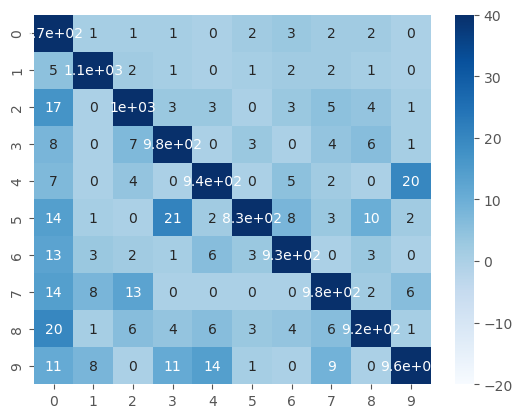

In [95]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytrue, Ypredicted)
print(cm)
df_cm = pd.DataFrame(cm)

#plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, vmin=-20, vmax=40, cmap="Blues")


In [96]:
from sklearn.metrics import classification_report

print(classification_report(Ytrue, Ypredicted))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.96      0.96       982
           5       0.98      0.93      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



# Exercise 

Modify the code to get a better testing accuracy.
- Change the number of hidden units
- Increase the number of hidden layers
- Use a different optimizer

In [109]:
# Create a model object
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

### modified 
dnnModel_ex1 = models.Sequential()

# Layer 1 = hidden layer
# specify the input size in the first layer.MLP

dnnModel_ex1.add(layers.Dense(128, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer 
dnnModel_ex1.add(layers.Dense(64, activation='relu'))

# Layer 3 = hidden layer 
dnnModel_ex1.add(layers.Dense(32, activation='relu'))

# Layer 4 = hidden layer 
dnnModel_ex1.add(layers.Dense(16, activation='relu'))

# Layer 5 = output layer
# number of neurons = number of classes = 10
dnnModel_ex1.add(layers.Dense(10, activation='softmax'))

dnnModel_ex1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 128)               100480    
                                                                 
 dense_60 (Dense)            (None, 64)                8256      
                                                                 
 dense_61 (Dense)            (None, 32)                2080      
                                                                 
 dense_62 (Dense)            (None, 16)                528       
                                                                 
 dense_63 (Dense)            (None, 10)                170       
                                                                 
Total params: 111514 (435.60 KB)
Trainable params: 111514 (435.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
# Compile the model with a different optimizer
optimizer = optimizers.RMSprop(learning_rate=0.001)
dnnModel_ex1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#dnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [111]:
# train the model

h  = dnnModel_ex1.fit( Xtrain, Ytrain, epochs=25, validation_split=0.1, batch_size=64)

Epoch 1/25
844/844 [==============================] - 9s 9ms/step - loss: 0.3563 - accuracy: 0.8971 - val_loss: 0.1299 - val_accuracy: 0.9620
Epoch 2/25
844/844 [==============================] - 8s 10ms/step - loss: 0.1345 - accuracy: 0.9598 - val_loss: 0.0977 - val_accuracy: 0.9707
Epoch 3/25
844/844 [==============================] - 7s 9ms/step - loss: 0.0959 - accuracy: 0.9713 - val_loss: 0.0938 - val_accuracy: 0.9717
Epoch 4/25
844/844 [==============================] - 8s 10ms/step - loss: 0.0745 - accuracy: 0.9777 - val_loss: 0.0761 - val_accuracy: 0.9785
Epoch 5/25
844/844 [==============================] - 9s 11ms/step - loss: 0.0599 - accuracy: 0.9819 - val_loss: 0.0938 - val_accuracy: 0.9735
Epoch 6/25
844/844 [==============================] - 8s 10ms/step - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.0811 - val_accuracy: 0.9795
Epoch 7/25
844/844 [==============================] - 7s 9ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0791 - val_accuracy: 0.9800
Ep

In [112]:
#print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])
#print('Final training loss \t', h.history['val_loss'][-1])
print('Final validation accuracy ', h.history['val_accuracy'][-1])

Final training accuracy  0.9978148341178894
Final validation accuracy  0.9778333306312561


In [113]:
# testing the model
# saving previous model test accuracy
testLoss, testAccuracy = dnnModel_ex1.evaluate( Xtest, Ytest)
test_accuracy_model2 = testAccuracy
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.1852 - accuracy: 0.9774
Testing loss 	 0.1851697862148285
Testing accuracy  0.977400004863739


In [114]:
num_classes = 9

#traget names
target_names = ["Class {}".format(i) for i in range(num_classes)]

Ytrue = np.argmax(Ytest,axis = 1)

# Predict Labels
Ypredicted = dnnModel_ex1.predict(Xtest)
Ypredicted = np.argmax(np.round(Ypredicted),axis=1)

313/313 [==============================] - 2s 5ms/step


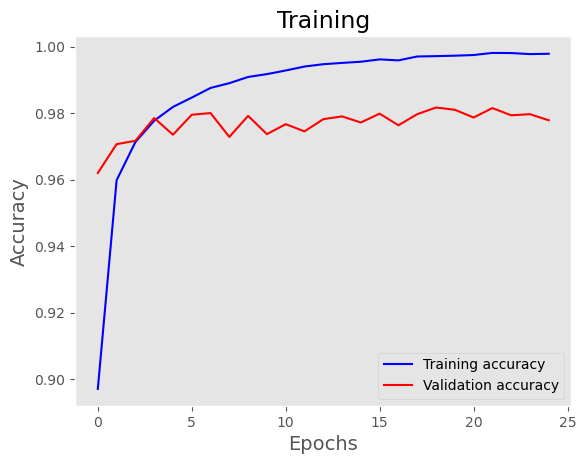

In [115]:
import matplotlib.pyplot as plt 

accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']

# plot loss and accuracy
epochs = range(len(accuracy))

plt.style.use('ggplot')
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'red', label='Validation accuracy')
plt.yticks((0.9,0.92,0.94,0.96,0.98,1.0))
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training', fontsize=17)
plt.legend(loc='lower right') 
plt.grid(None)

plt.show()

[[ 968    1    1    0    1    2    5    1    1    0]
 [   0 1125    1    0    1    4    3    0    1    0]
 [   2    6 1010    2    3    1    0    7    0    1]
 [   0    0    4  990    0    6    0    4    5    1]
 [   1    1    3    1  966    0    3    1    0    6]
 [   1    0    0    7    3  875    4    0    1    1]
 [   2    2    0    1    6    4  943    0    0    0]
 [   4    9    9    3    2    0    0  996    4    1]
 [   2    1    4    9    8    7    4    3  934    2]
 [   2    2    0    6   17    8    1    5    2  966]]


<AxesSubplot:>

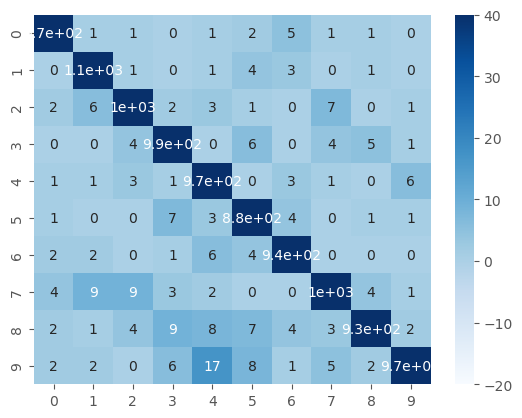

In [116]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytrue, Ypredicted)
print(cm)
df_cm = pd.DataFrame(cm)

#plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, vmin=-20, vmax=40, cmap="Blues")

In [117]:
from sklearn.metrics import classification_report

print(classification_report(Ytrue, Ypredicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.96      0.98      0.97       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.99      0.96      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [118]:
print("Given Model    - SGD Optimizer     Test Accuracy",test_accuracy_model1)
print("Modified Model - RMSProp Optimizer Test Accuracy",test_accuracy_model2)

Given Model    - SGD Optimizer     Test Accuracy 0.9664000272750854
Modified Model - RMSProp Optimizer Test Accuracy 0.977400004863739


###  Summary : Modified DNN model has slightly better accuracy with using RMSProp optimizer.